In [6]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s


===== Aperçu des données =====
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  

Dimensions : (45211, 17)

Colonnes :

/tmp/ipython-input-2948434472.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=data, palette="Set2")


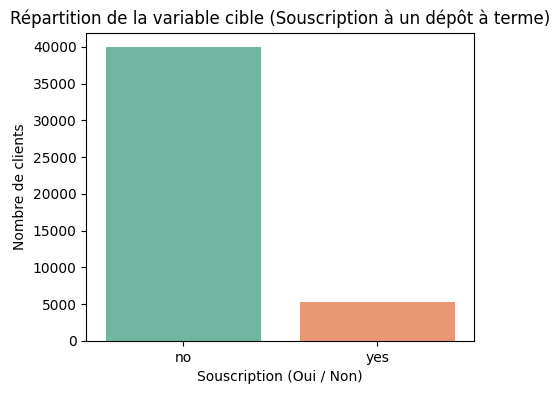

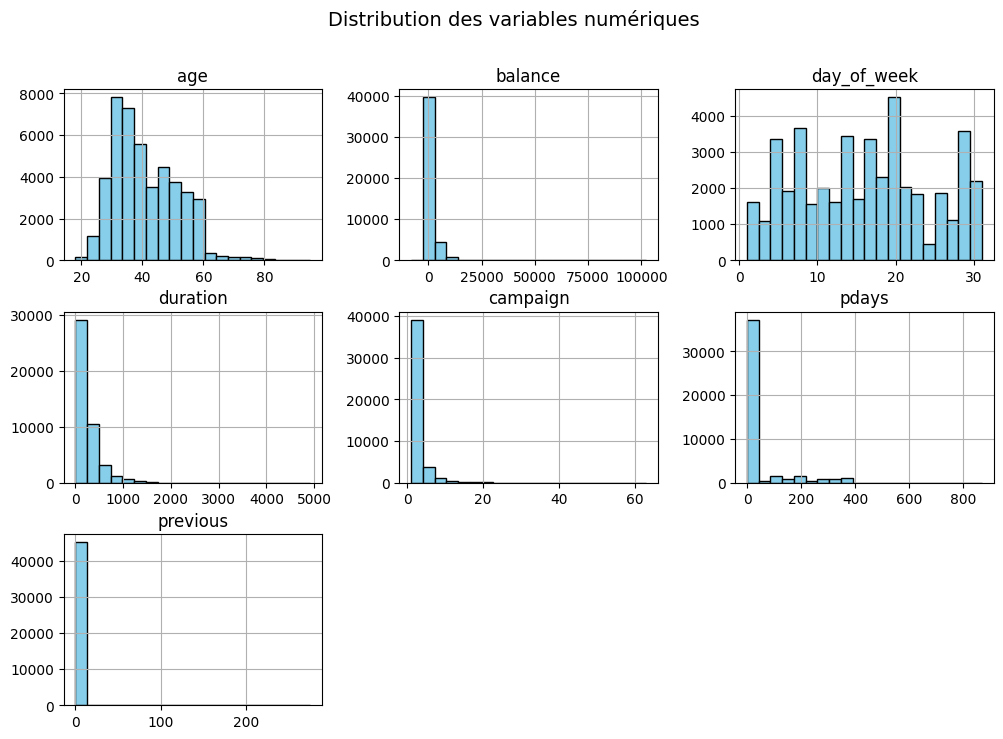

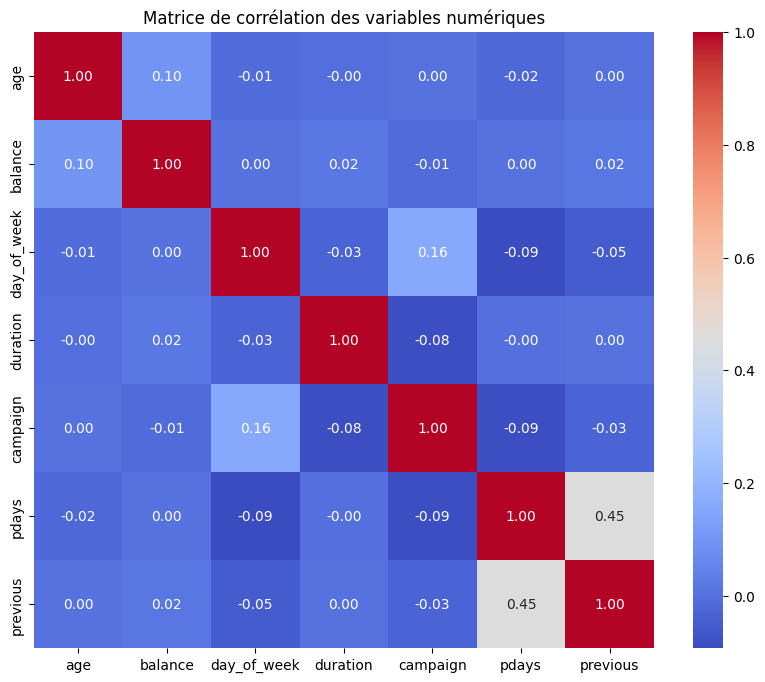

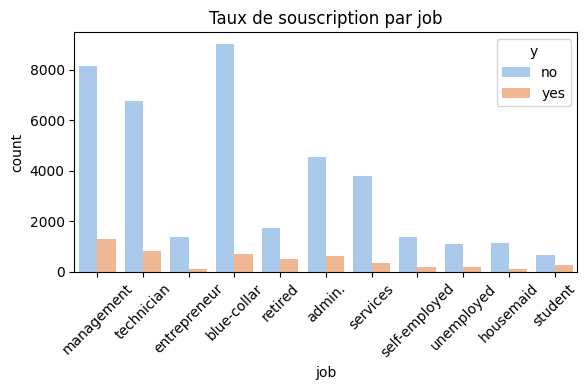

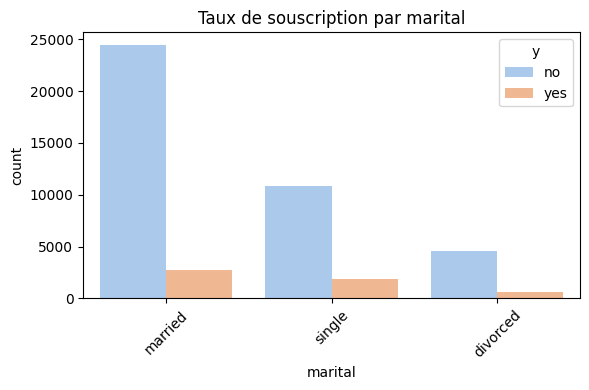

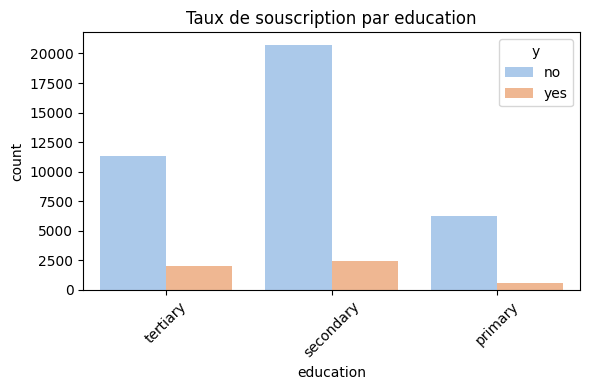

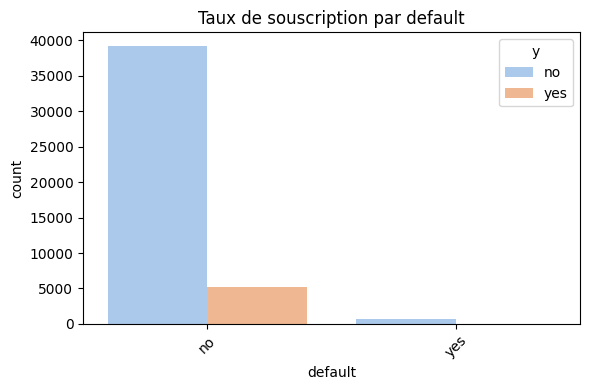

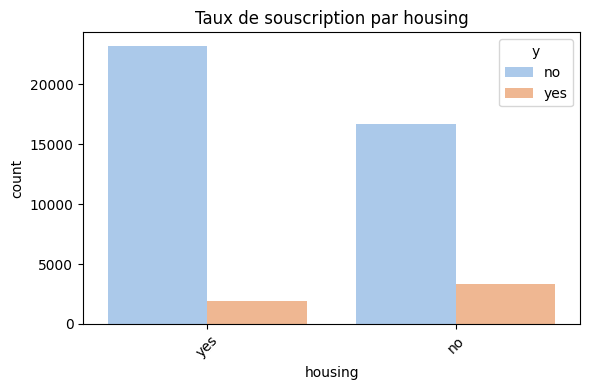

/tmp/ipython-input-2948434472.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y='age', data=data, palette="Set3")


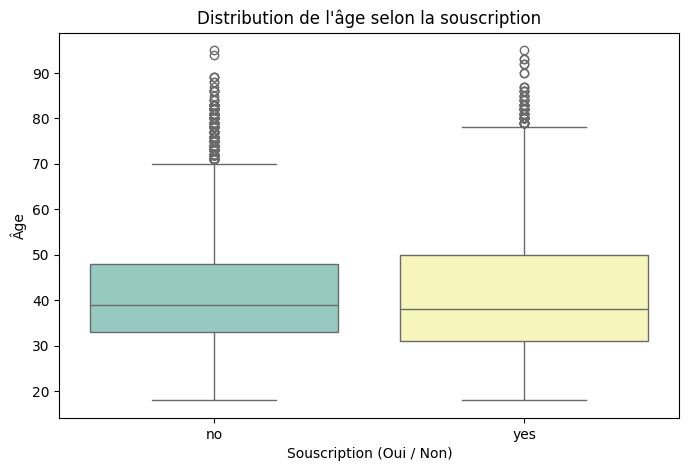


===== Interprétation générale =====

1️⃣ La variable cible est souvent déséquilibrée (plus de 'non' que de 'oui').
2️⃣ L’âge, le solde moyen et le nombre de contacts influencent la probabilité de souscription.
3️⃣ Certaines professions et niveaux d’éducation montrent des taux de souscription plus élevés.
4️⃣ Les campagnes précédentes (pdays, previous, poutcome) ont un fort impact.
5️⃣ Les relations entre variables numériques sont modérées, sauf entre celles liées à la durée d'appel et au succès.



In [7]:
# ===========================================
# 📊 ANALYSE EXPLORATOIRE DU DATASET BANK MARKETING
# ===========================================

# === 1. IMPORT DES LIBRAIRIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (si seaborn n'est pas installé)
# !pip install seaborn

# === 2. CHARGEMENT DU DATASET ===
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Fusion des features et de la variable cible
data = pd.concat([X, y], axis=1)

# === 3. APERÇU DU DATASET ===
print("\n===== Aperçu des données =====")
print(data.head())
print("\nDimensions :", data.shape)
print("\nColonnes :", list(data.columns))

# === 4. INFORMATIONS GÉNÉRALES ===
print("\n===== Informations générales =====")
print(data.info())

print("\n===== Statistiques descriptives =====")
print(data.describe(include='all').T)

# === 5. VALEURS MANQUANTES ===
print("\n===== Valeurs manquantes =====")
print(data.isnull().sum())

# === 6. DISTRIBUTION DE LA VARIABLE CIBLE ===
target_col = y.columns[0]
plt.figure(figsize=(5, 4))
sns.countplot(x=target_col, data=data, palette="Set2")
plt.title("Répartition de la variable cible (Souscription à un dépôt à terme)")
plt.xlabel("Souscription (Oui / Non)")
plt.ylabel("Nombre de clients")
plt.show()

# === 7. DISTRIBUTIONS DE QUELQUES VARIABLES NUMÉRIQUES ===
numeric_cols = data.select_dtypes(include=np.number).columns

data[numeric_cols].hist(bins=20, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution des variables numériques", fontsize=14)
plt.show()

# === 8. CORRÉLATIONS ENTRE VARIABLES NUMÉRIQUES ===
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# === 9. ANALYSE CROISÉE : TAUX DE SOUSCRIPTION PAR CATÉGORIE ===
cat_cols = data.select_dtypes(exclude=np.number).columns

for col in cat_cols[:5]:  # on limite à 5 pour éviter trop de graphiques
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=data, palette="pastel")
    plt.title(f"Taux de souscription par {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === 10. ANALYSE DU TAUX DE SOUSCRIPTION SELON L’ÂGE ===
plt.figure(figsize=(8, 5))
sns.boxplot(x=target_col, y='age', data=data, palette="Set3")
plt.title("Distribution de l'âge selon la souscription")
plt.xlabel("Souscription (Oui / Non)")
plt.ylabel("Âge")
plt.show()

# === 11. INTERPRÉTATION RAPIDE ===
print("\n===== Interprétation générale =====")
print("""
1️⃣ La variable cible est souvent déséquilibrée (plus de 'non' que de 'oui').
2️⃣ L’âge, le solde moyen et le nombre de contacts influencent la probabilité de souscription.
3️⃣ Certaines professions et niveaux d’éducation montrent des taux de souscription plus élevés.
4️⃣ Les campagnes précédentes (pdays, previous, poutcome) ont un fort impact.
5️⃣ Les relations entre variables numériques sont modérées, sauf entre celles liées à la durée d'appel et au succès.
""")
